## 1. 온도, 습도, 조도, CO2농도에 따른 객실의 사용 유무

### 1-1 데이터 EDA 후, 의미있는 탐색

In [2]:
import pandas as pd
import numpy as np

problem1 = pd.read_csv('problem1.csv')
problem1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


In [3]:
problem1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB


In [4]:
problem1.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17910.000000,17910.000000,17910.000000,17889.000000,17910.000000,17910.000000
mean,20.749036,27.589163,78.157369,647.700865,0.004175,0.117253
std,0.994012,5.043595,168.574068,285.997340,0.000755,0.321730
min,19.000000,16.745000,-99.000000,412.750000,0.002674,0.000000
25%,20.100000,24.390000,0.000000,453.000000,0.003702,0.000000
50%,20.600000,27.200000,0.000000,532.666667,0.004222,0.000000
75%,21.200000,31.290000,22.000000,722.000000,0.004790,0.000000
max,24.408333,39.500000,1581.000000,2076.500000,0.006461,1.000000


In [5]:
problem1.isnull().sum()

date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64

CO2컬럼에만 결측치 존재
10%미만이므로 대체

In [10]:
corr_m = problem1.corr()
corr_m['Occupancy'].sort_values(ascending=False)

Occupancy        1.000000
Light            0.867240
Temperature      0.453281
CO2              0.409959
HumidityRatio    0.198232
Humidity         0.032376
Name: Occupancy, dtype: float64

array([[<AxesSubplot:xlabel='Temperature', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Humidity', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Light', ylabel='Temperature'>,
        <AxesSubplot:xlabel='CO2', ylabel='Temperature'>,
        <AxesSubplot:xlabel='HumidityRatio', ylabel='Temperature'>,
        <AxesSubplot:xlabel='Occupancy', ylabel='Temperature'>],
       [<AxesSubplot:xlabel='Temperature', ylabel='Humidity'>,
        <AxesSubplot:xlabel='Humidity', ylabel='Humidity'>,
        <AxesSubplot:xlabel='Light', ylabel='Humidity'>,
        <AxesSubplot:xlabel='CO2', ylabel='Humidity'>,
        <AxesSubplot:xlabel='HumidityRatio', ylabel='Humidity'>,
        <AxesSubplot:xlabel='Occupancy', ylabel='Humidity'>],
       [<AxesSubplot:xlabel='Temperature', ylabel='Light'>,
        <AxesSubplot:xlabel='Humidity', ylabel='Light'>,
        <AxesSubplot:xlabel='Light', ylabel='Light'>,
        <AxesSubplot:xlabel='CO2', ylabel='Light'>,
        <AxesSubplot:xlabel='Humidi

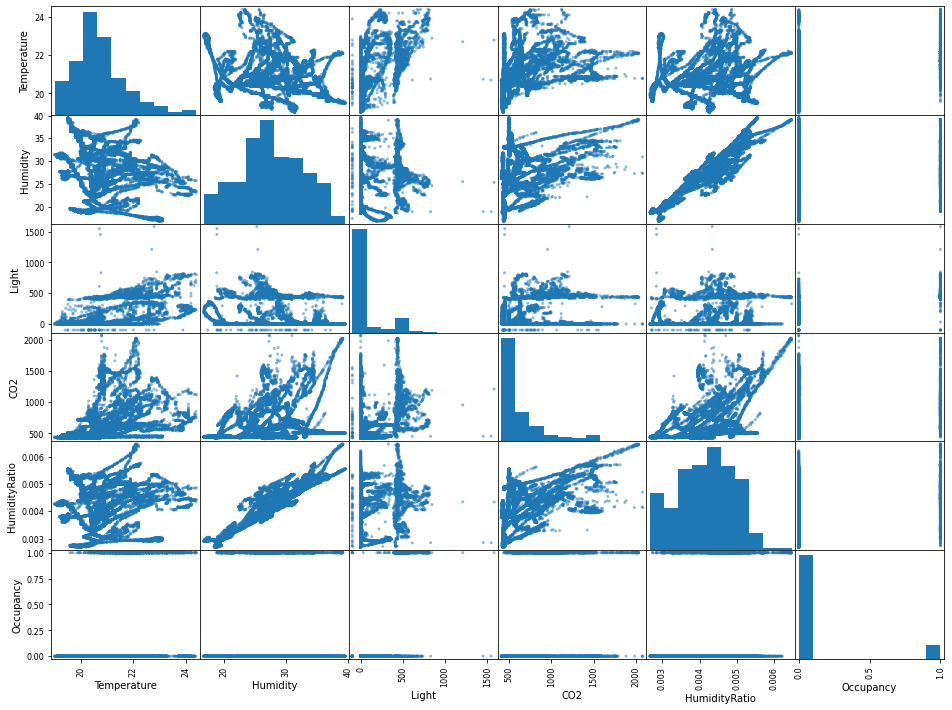

In [12]:
#상관관계 시각화
from pandas.plotting import scatter_matrix

scatter_matrix(problem1,figsize=(16,12))

humidityRatio - humidity 사이의 상관관계가 가장 높아보임

### 결측치 대체 및 근거 제시